In [3]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
import statistics as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [4]:
# read data from csv file and put into one matrix 
# same process of v1
def readData(filename,x1):
    f = open("data/"+filename,'r')
    for row in f:
        data = [int(p) for p in row.split(',')]
        x1.append(np.array(data))
    return 

x = []
readData("getOutBed.csv",x)
readData("getOnBed.csv",x)
readData("layOnBed.csv",x)
readData("sitOnBed.csv",x)

In [5]:
x = np.array(x)


In [6]:
x_feature = []
for r in x:
    s1, s2, s3 = r[:20000], r[20000:40000], r[40000:]
    temp1 = [stats.mean(s1), stats.median(s1), stats.variance(s1), max(s1), min(s1)]
    temp2 = [stats.mean(s2), stats.median(s2), stats.variance(s2), max(s2), min(s2)]
    temp3 = [stats.mean(s3), stats.median(s3), stats.variance(s3), max(s3), min(s3)]
#     print temp1
    x_feature.append(np.array(temp1+temp2+temp3))


In [13]:
y = np.array([0]*120+[1]*120+[2]*120+[3]*120)
x_feature = np.array(x_feature)

In [14]:
# shuffle X and Y correspondingly 
X, Y = shuffle(x_feature, y, random_state = 34)
offset = int(len(X)*0.8)
X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]
print (type(X_train), type(Y_train))
print (len(X_train), len(X_train[0]), len(Y_train), len(X_test), len(X_test[0]), len(Y_test))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)
(384, 15, 384, 96, 15, 96)


## SVM

In [9]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [10]:
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
results = clf.predict(X_test)
correct = 0
for i in xrange(len(results)):
    if results[i] == Y_test[i]:
        correct+=1
print (correct/float(len(Y_test)))

0.666666666667


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, Y_train).predict(X_test)

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
y_pred = clf.fit(X_train, Y_train).predict(X_test)

In [10]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[18  6  2  1]
 [ 5 22  0  0]
 [ 2  0  7 13]
 [ 1  0  2 17]]
Normalized confusion matrix
[[0.67 0.22 0.07 0.04]
 [0.19 0.81 0.   0.  ]
 [0.09 0.   0.32 0.59]
 [0.05 0.   0.1  0.85]]


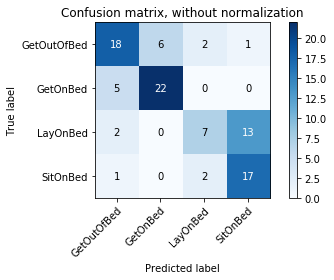

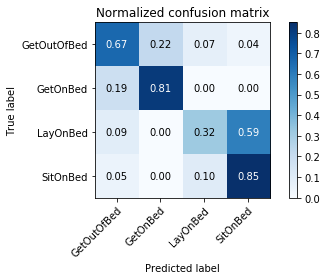

In [18]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## GAUSSIAN NAIVE BAYES

In [19]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
results_nb = clf_nb.predict(X_test)
print results_nb

[3 1 3 1 1 2 1 0 0 0 1 1 0 2 0 1 3 3 0 0 2 3 3 1 2 1 2 3 0 2 1 3 3 1 0 2 3
 2 1 1 0 3 0 3 0 3 3 2 1 1 1 0 3 3 0 3 1 1 2 1 1 0 0 3 3 3 0 0 1 3 0 3 3 2
 3 0 3 0 3 2 2 3 0 0 0 1 0 1 3 2 2 1 2 2 0 3]


In [22]:
# verification
c_nb = 0 
for i in xrange(len(results_nb)):
    if results_nb[i] == Y_test[i]:
        c_nb += 1
print (c_nb/float(len(Y_test)))

0.729166666667


Confusion matrix, without normalization
[[21  3  2  1]
 [ 5 21  1  0]
 [ 0  0 11 11]
 [ 0  0  3 17]]
Normalized confusion matrix
[[0.78 0.11 0.07 0.04]
 [0.19 0.78 0.04 0.  ]
 [0.   0.   0.5  0.5 ]
 [0.   0.   0.15 0.85]]


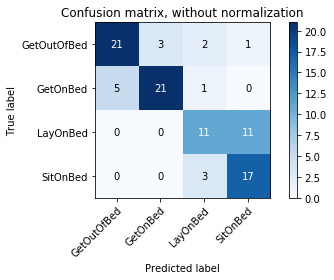

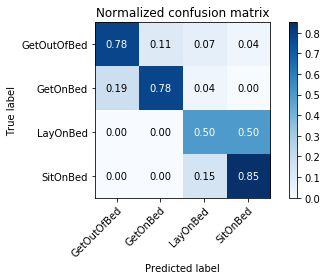

In [23]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, results_nb, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results_nb, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Gradient Boosting Classifier

In [25]:
clf_gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=3, random_state=0, verbose = True).fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1         195.0820            2.21s
         2         113.7702            2.09s
         3          76.8745            2.01s
         4          54.0832            1.94s
         5          36.5334            1.94s
         6          26.4925            1.94s
         7          21.3755            1.91s
         8          17.2938            1.92s
         9          13.9498            1.90s
        10          10.9163            1.89s
        20           1.8070            1.66s
        30           0.3861            1.50s
        40           0.1247            1.34s
        50           0.0959            1.17s
        60           0.0959            1.03s
        70           0.0959            0.93s
        80           0.0959            0.85s
        90           0.0959            0.78s
       100           0.0959            0.73s
       200           0.0959            0.43s
       300           0.0959            0.26s
       40

In [26]:
results_gbc = clf_gbc.predict(X_test)


Confusion matrix, without normalization
[[21  1  3  2]
 [ 1 25  1  0]
 [ 1  0 11 10]
 [ 0  0  4 16]]
Normalized confusion matrix
[[0.78 0.04 0.11 0.07]
 [0.04 0.93 0.04 0.  ]
 [0.05 0.   0.5  0.45]
 [0.   0.   0.2  0.8 ]]


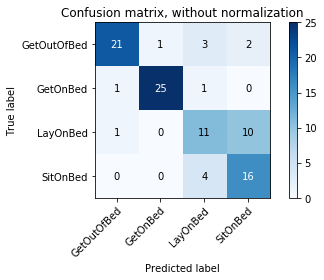

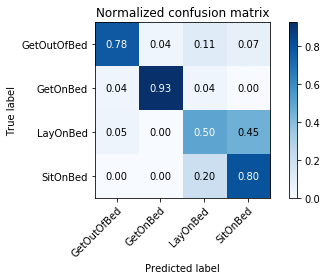

In [27]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, results_gbc, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results_gbc, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [28]:
clf_gbc.score(X_test,Y_test)

0.7604166666666666